# Dataset exploration
Thr purpose of this notebook is to preform Exploratory Data Analysis that will help us later on in 3 main domains:<br>
1. Validating "serious" and "random" labeling<br>
2. creating a baseline for random sentence similarity for different labelers\datasets.<br>
3. clustering and identifying different types of labelers.<br>

each of these missions might prove to be a bit different from the rest so for each segment we will pose new questions that we'll try to find intuitions for in the data.



# General preperations
1. data loading<br>
2. combining the data into a united dataset with identifiers for each dataset <br>
3. general exploration on dataset imbalances

In [362]:
df.head()

,annotator,text1,text2,label,dataset,random,duration
0,A3BCGN11HDM8QR,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",2,bible_human,0,00:00:12
1,A3SQ00HYQN7FYB,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",3,bible_human,0,00:00:12
2,A5WAWW70PYRP,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",4,bible_human,0,00:07:19
3,AE608VRXK6M2E,"And Ibneiah , the son of Jeroham , and Elah , ...","and Ibneiah son of Jeroham , and Elah son of U...",5,bible_human,0,00:10:12
4,A22A52DRIIEV6K,"And Ibneiah , the son of Jeroham , and Elah , ...","and Ibneiah son of Jeroham , and Elah son of U...",4,bible_human,0,00:00:19


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import glob
import re

In [ ]:
df = pd.read_csv('data/datasets/combined_dataset.csv', index_col = 0)

In [127]:
len(df.groupby('annotator').size()[df.groupby('annotator').size()>1])

401

combained Datasets contains labels from 463 unique users of whom 401 have more than 1 pair labeled


size      mean       std
annotator             random                          
A002160837SWJFPIAI7L7 0          1  4.000000       NaN
A103ZXTULBGA3J        0          1  1.000000       NaN
A10DMENL2H243H        0          1  3.000000       NaN
A110SC5K5Y3IHS        0          2  1.500000  0.707107
                      1          3  1.333333  0.577350
A11YCM5MVQ35YY        0          8  3.000000  1.309307
                      1         25  1.200000  0.645497
A123PBQDU71I5O        0          4  2.750000  0.957427
                      1          3  3.333333  0.577350
A12BPQY35PARUO        0         93  3.537634  1.456314
                      1        114  1.035088  0.227718
A12NTFM8C8ZFSH        0         66  3.439394  1.479384
                      1          8  1.250000  0.462910
A139DFNZS0I9RB        0         86  3.720930  1.368994
                      1         36  1.416667  0.731925
A13CLN8L5HFT46        0          2  3.000000  1.414214
A13STUE0VL42FA        0         10  2.800000  0.632456
                      1         66  2.590909  0.525570
A13XLIF77WB05P        0         85  4.094118  1.097872
                      1        155  3.200000  0.776271
A140DPSW275GFR        0          5  3.600000  0.547723
A142UVY0NHR97M        1         16  1.062500  0.250000
A14A6Z1ESONR5Z        0          1  1.000000       NaN
A14CLZWROI8UCS        0        240  3.750000  1.308166
                      1        279  1.143369  0.425218

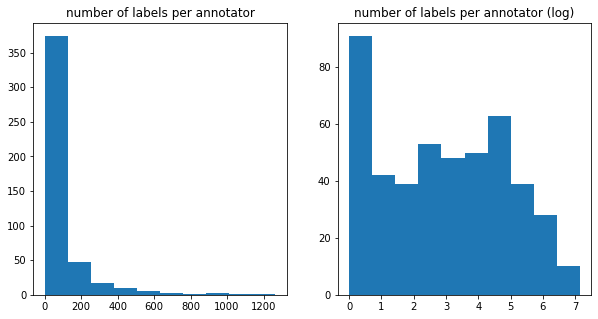

In [165]:
# Number of labeler
print(f"combained Datasets contains labels from {len(df.annotator.unique())} unique users of whom {len(df.groupby('annotator').size()[df.groupby('annotator').size()>1])} have more than 1 pair labeled")

plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df.groupby('annotator').size())
plt.title('number of labels per annotator')
plt.subplot(1,2,2)
plt.hist(np.log(df.groupby('annotator').size()))
plt.title('number of labels per annotator (log)')

# Number of labels, mean and std for each independent of each labeler
df.groupby(['annotator','random']).agg(['size','mean','std'])['label'][:25]

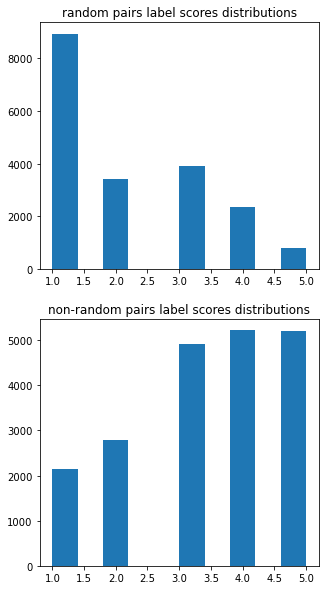

In [348]:
plt.subplots(2,1, figsize=(5,10))
plt.subplot(2,1,1);
plt.hist(df[df.random==1].label);
plt.title('random pairs label scores distributions');
plt.subplot(2,1,2);
plt.hist(df[df.random==0].label);
plt.title('non-random pairs label scores distributions');


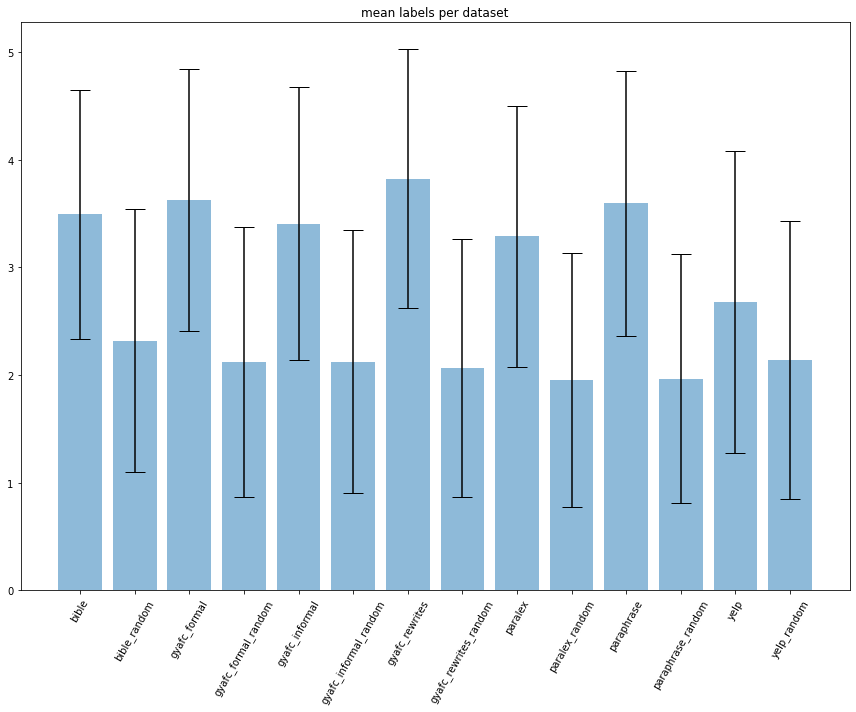

In [271]:
plt.subplots(figsize=(12,10))
plt.bar(x = [ds[:-6] for ds in df.dataset.unique()],height = df.groupby('dataset')['label'].mean(),
yerr=df.groupby('dataset')['label'].std(), alpha=0.5, ecolor='black', capsize=10)
plt.xticks(rotation = 60);
plt.title ('mean labels per dataset')
plt.tight_layout()

#df[df.random==1].groupby('dataset').agg(['size','mean','std'])['label'])

In [266]:
labelers = df[df.random==0].groupby(['annotator'])['label'].agg(['size','mean','std','min','max'])
labelers = labelers[labelers['size']>1]

labelers_rand = df[df.random==1].groupby(['annotator'])['label'].agg(['size','mean','std','min','max'])
labelers_rand = labelers_rand[labelers_rand['size']>1]
labelers = labelers.join(labelers_rand, rsuffix = '_rand')

In [363]:
labelers.mean_rand.describe()

count    252.000000
mean       1.731629
std        0.866861
min        1.000000
25%        1.072074
50%        1.339869
75%        2.087859
max        5.000000
Name: mean_rand, dtype: float64

In [272]:
labelers['mean_random_gap'] = labelers['mean']-labelers['mean_rand']
labelers['std_ratio'] = labelers['std']/labelers['std_rand']


In [276]:
labelers.head()

,size,mean,std,min,max,size_rand,mean_rand,std_rand,min_rand,max_rand,mean_random_gap,std_ratio
annotator,,,,,,,,,,,,
A110SC5K5Y3IHS,2,1.500000,0.707107,1,2,3.0,1.333333,0.577350,1.0,2.0,0.166667,1.224745
A11YCM5MVQ35YY,8,3.000000,1.309307,1,5,25.0,1.200000,0.645497,1.0,4.0,1.800000,2.028370
A123PBQDU71I5O,4,2.750000,0.957427,2,4,3.0,3.333333,0.577350,3.0,4.0,-0.583333,1.658312
A12BPQY35PARUO,93,3.537634,1.456314,1,5,114.0,1.035088,0.227718,1.0,3.0,2.502547,6.395264
A12NTFM8C8ZFSH,66,3.439394,1.479384,1,5,8.0,1.250000,0.462910,1.0,2.0,2.189394,3.195835


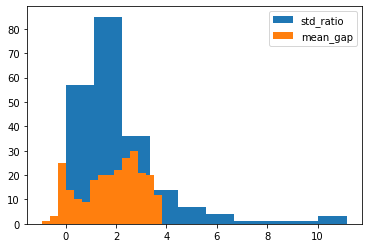

In [342]:
plt.hist(labelers[labelers.std_ratio<np.inf].std_ratio);
plt.hist(labelers.mean_random_gap,bins = 15);
plt.legend(['std_ratio', 'mean_gap'])


In [298]:
suspicious = labelers[labelers.mean_random_gap<0]
suspicious

,size,mean,std,min,max,size_rand,mean_rand,std_rand,min_rand,max_rand,mean_random_gap,std_ratio
annotator,,,,,,,,,,,,
A123PBQDU71I5O,4,2.750000,0.957427,2,4,3.0,3.333333,0.577350,3.0,4.0,-0.583333,1.658312
A14KIIR8FGYCHO,202,4.727723,0.683948,1,5,203.0,4.812808,0.471393,2.0,5.0,-0.085085,1.450908
A168NGIUW93RV5,210,3.071429,1.275324,1,5,133.0,3.172932,1.299833,1.0,5.0,-0.101504,0.981145
A1SBFOZG5J97Z1,7,1.571429,0.786796,1,3,2.0,2.500000,0.707107,2.0,3.0,-0.928571,1.112697
A1U9XC376J6ZQ2,161,3.484472,0.829952,1,5,166.0,3.542169,0.775398,2.0,5.0,-0.057697,1.070356
A1WZJ8VFE5TUO6,34,3.441176,1.956979,1,5,13.0,3.692308,1.887883,1.0,5.0,-0.251131,1.036600
A21IZYCFI4AUYU,174,3.000000,0.680020,1,5,174.0,3.011494,0.578902,2.0,4.0,-0.011494,1.174673
A2BA1R9MAHHWJH,195,2.728205,0.954087,1,5,199.0,2.964824,0.727365,2.0,4.0,-0.236619,1.311704
A2UEGJLWV8VYZA,14,2.642857,1.081818,1,5,52.0,2.730769,0.597885,1.0,4.0,-0.087912,1.809409


In [360]:
df[df.annotator.apply(lambda x: x in suspicious.index)].duration.astype('timedelta64[s]').mean()

70.84385382059801

In [361]:
df[df.annotator.apply(lambda x: x not in suspicious.index)].duration.astype('timedelta64[s]').mean()

88.56648301464305

In [366]:
labelers[['size','size_rand']].describe()

,size,size_rand
count,348.000000,252.000000
mean,58.048851,74.650794
std,89.561503,101.859783
min,2.000000,2.000000
25%,7.000000,10.000000
50%,23.000000,36.500000
75%,67.500000,92.250000
max,593.000000,690.000000
